## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data =pd.merge(mouse_metadata, study_results, on ="Mouse ID", how ='outer' ) 

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
No_mice = len(combined_data["Mouse ID"].value_counts())
No_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicateRowsDF = combined_data[combined_data.duplicated(['Mouse ID', 'Timepoint'])]
duplicateRowsDF['Mouse ID'].value_counts()

g989    5
Name: Mouse ID, dtype: int64

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate = combined_data.loc[(combined_data["Mouse ID"]=='g989')]
duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_data.loc[(combined_data["Mouse ID"]!='g989')]


In [6]:
# Checking the number of mice in the clean DataFrame.
No_mice = len(clean_df["Mouse ID"].value_counts())
No_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

drug_data = clean_df.groupby(['Drug Regimen'])
mean_tv = drug_data["Tumor Volume (mm3)"].mean()
median_tv = drug_data["Tumor Volume (mm3)"].median()
var_tv =drug_data["Tumor Volume (mm3)"].var()
std_tv = drug_data["Tumor Volume (mm3)"].std()
SEM_tv =drug_data["Tumor Volume (mm3)"].sem()

drug_data = pd.DataFrame({"Mean":mean_tv, "Median":median_tv, "Variance":var_tv, "Standard Deviation":std_tv, "SEM": SEM_tv})
drug_data


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

summary_drug_data = clean_df.groupby(['Drug Regimen'])
summary_drug_data["Tumor Volume (mm3)"].describe()

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,148.0,52.320930,6.622085,45.000000,46.894328,50.446266,56.491585,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


## Bar and Pie Charts

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

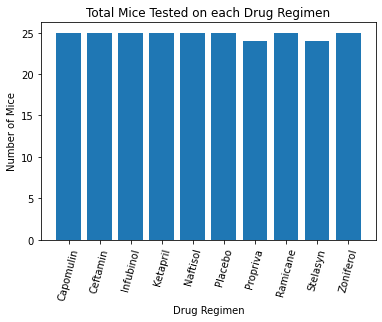

In [45]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
mice_data = clean_df.groupby(['Drug Regimen'])
mouse_amt = mice_data["Mouse ID"].nunique()
mice_df = pd.DataFrame({"Mice per Drug":mouse_amt})

x_axis = mice_df.index.values
plt.bar(x_axis, mouse_amt)
plt.title("Total Mice Tested on each Drug Regimen")
plt.ylabel("Number of Mice")
plt.xlabel("Drug Regimen")
plt.xticks(rotation =75)
                                       



In [ ]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.




In [49]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_data = clean_df.groupby(['Sex'])
mouse_amt_gender = gender_data["Mouse ID"].nunique()
mice_gender_df = pd.DataFrame({"Mice per Drug":mouse_amt_gender})
mice_gender_df





,Mice per Drug
Sex,
Female,123
Male,125


In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
